In [2]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from scipy import stats
%matplotlib inline

# Random Forest Model

In [154]:
zri = pd.read_csv('df3.csv', index_col=0)


In [155]:
zri['education'] = zri['high_school_diploma'] + zri['associates_degree'] * 2 + zri['bachelors_degree'] * 3 +zri['masters_degree']* 4

In [156]:
zri['MortDeliq30-89'] = zri['MortDeliq30-89'].fillna(zri['MortDeliq30-89'].mean())
zri['MortDeliq90'] = zri['MortDeliq90'].fillna(zri['MortDeliq90'].mean())


In [157]:
value_2013 = zri.loc[zri['Year']==2013][['ZIPCODE', 'Month','value']].rename(columns = {'value' : 'value_2013'})
value_2014 = zri.loc[zri['Year']==2014][['ZIPCODE', 'Month','value']].rename(columns = {'value' : 'value_2014'})
value_2015 = zri.loc[zri['Year']==2015][['ZIPCODE', 'Month','value']].rename(columns = {'value' : 'value_2015'})
value_2016 = zri.loc[zri['Year']==2016][['ZIPCODE', 'Month','value']].rename(columns = {'value' : 'value_2016'})
value_2017 = zri.loc[zri['Year']==2017][['ZIPCODE', 'Month','value']].rename(columns = {'value' : 'value_2017'})
value_2018 = zri.loc[zri['Year']==2018][['ZIPCODE', 'Month','value']].rename(columns = {'value' : 'value_2018'})
value_2019 = zri.loc[zri['Year']==2019][['ZIPCODE', 'Month','value']].rename(columns = {'value' : 'value_2019'})


In [158]:
dropped = [ 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'Year-Month', 'value', 'Month', 'Year', 'year',  'geo_id', 'FIPSCode',
          'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree' , 'Employed', 'Unemployed',
          'AGIncome','TotIncome', 'SalariesWages', 'Labor\nForce']

In [169]:
train = pd.merge(zri.loc[zri['Year']==2015].rename(columns = {'value' : 'value_2015'}),
                 zri.loc[zri['Year']==2018][['ZIPCODE', 'Month','value']],
                 how = 'left', on = ['ZIPCODE', 'Month'])
test = pd.merge(zri.loc[zri['Year']==2018].rename(columns = {'value' : 'value_2018'}),
                zri.loc[zri['Year']==2019][['ZIPCODE', 'Month','value']],
                how = 'left', on = ['ZIPCODE', 'Month'])


In [170]:
'''
average_value = pd.merge(value_2013, value_2014, how = 'left', on = ['ZIPCODE', 'Month'])
average_value = pd.merge(average_value, value_2015, how = 'left', on = ['ZIPCODE', 'Month'])
average_value['average_value_3yr'] = (average_value['value_2013'] +average_value['value_2014']+ average_value['value_2015'])/3

train = pd.merge(zri.loc[zri['Year']==2015].drop(columns = 'value'),
                 zri.loc[zri['Year']==2016][['ZIPCODE', 'Month','value']],
                 how = 'left', on = ['ZIPCODE', 'Month'])
train = pd.merge(train, average_value, how = 'left', on = ['ZIPCODE', 'Month']).drop(columns = ['value_2013','value_2014','value_2015'])

average_value_test= pd.merge(value_2016, value_2017, how = 'left', on = ['ZIPCODE', 'Month'])
average_value_test = pd.merge(average_value_test, value_2018, how = 'left', on = ['ZIPCODE', 'Month'])
average_value_test['average_value_3yr'] = (average_value_test['value_2016'] +average_value_test['value_2017']+ average_value_test['value_2018'])/3

test = pd.merge(zri.loc[zri['Year']==2018].drop(columns = 'value'),
                zri.loc[zri['Year']==2019][['ZIPCODE', 'Month','value']],
                how = 'left', on = ['ZIPCODE', 'Month'])
test = pd.merge(test, average_value_test, how = 'left', on = ['ZIPCODE', 'Month']).drop(columns = ['value_2016','value_2017','value_2018'])
'''

"\naverage_value = pd.merge(value_2013, value_2014, how = 'left', on = ['ZIPCODE', 'Month'])\naverage_value = pd.merge(average_value, value_2015, how = 'left', on = ['ZIPCODE', 'Month'])\naverage_value['average_value_3yr'] = (average_value['value_2013'] +average_value['value_2014']+ average_value['value_2015'])/3\n\ntrain = pd.merge(zri.loc[zri['Year']==2015].drop(columns = 'value'),\n                 zri.loc[zri['Year']==2016][['ZIPCODE', 'Month','value']],\n                 how = 'left', on = ['ZIPCODE', 'Month'])\ntrain = pd.merge(train, average_value, how = 'left', on = ['ZIPCODE', 'Month']).drop(columns = ['value_2013','value_2014','value_2015'])\n\naverage_value_test= pd.merge(value_2016, value_2017, how = 'left', on = ['ZIPCODE', 'Month'])\naverage_value_test = pd.merge(average_value_test, value_2018, how = 'left', on = ['ZIPCODE', 'Month'])\naverage_value_test['average_value_3yr'] = (average_value_test['value_2016'] +average_value_test['value_2017']+ average_value_test['value_2

In [171]:
train = train.dropna()
test = test.dropna()
#train = train.replace(np.nan, 0)

In [172]:
X_train = train.drop(columns = dropped)
X_test = test.drop(columns = dropped)
y_train = train['value']
y_test = test['value']

In [178]:
#X_train['AGIncome'] = (X_train['AGIncome']*1000)/X_train['total_pop']
#X_train['TotIncome'] = (X_train['TotIncome']*1000)/X_train['total_pop']
#X_train['SalariesWages'] = (X_train['SalariesWages']*1000)/X_train['total_pop']
X_train['NumUnemply'] =(X_train['NumUnemply']*1000)/X_train['total_pop']
#X_train['TotTaxes'] = (X_train['TotTaxes']*1000)/X_train['total_pop']
X_train = X_train.replace(np.nan, 0) 

In [179]:
#X_test['AGIncome'] = (X_test['AGIncome']*1000)/X_test['total_pop']
#X_test['TotIncome'] = (X_test['TotIncome']*1000)/X_test['total_pop']
#X_test['SalariesWages'] = (X_test['SalariesWages']*1000)/X_test['total_pop']
X_test['NumUnemply'] = (X_test['NumUnemply']*1000)/X_test['total_pop']
#X_test['TotTaxes'] = (X_test['TotTaxes']*1000)/X_test['total_pop']
X_test = X_test.replace(np.nan, 0)

In [164]:
X_test.columns

Index(['ZIPCODE', 'value_2016', 'Season', 'NumUnemply', 'TotTaxes',
       'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89', 'MortDeliq90',
       'total_pop', 'median_age', 'white_pop', 'black_pop', 'asian_pop',
       'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'population_change', 'income_change', 'natural_amenity_rank',
       'education'],
      dtype='object')

In [193]:
# (1)
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor(n_estimators= 100, max_depth = 9, n_jobs = -1)

# fit RF model on training set
randomForest.set_params(random_state=0)
randomForest.fit(X_train, y_train) 

print("The training error is: %.5f" % (1 - randomForest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

The training error is: 0.00732
The test     error is: 0.05058


In [194]:
print(randomForest.score(X_train, y_train))
print(randomForest.score(X_test, y_test))

0.9926793339846313
0.94942317527403


In [18]:
grid_para_forest = {
    'max_depth': range(1, 20),
    'n_estimators': range(10, 150, 10)
}
import sklearn.model_selection as ms

In [19]:
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

/home/jack/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
exception calling callback for <Future at 0x7f5c67c94f50 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/home/jack/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/home/jack/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/home/jack/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/home/jack/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
 

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGKILL(-9)}

In [16]:
grid_search_forest.best_params_

{'max_depth': 19, 'n_estimators': 100}

In [17]:
grid_search_forest.best_score_

0.9950089998430176

In [182]:
feature_importance = list(zip(X_train.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:5]]

[b'value_2015', b'ZIPCODE', b'natural_am', b'hispanic_p', b'Unemploy-\n']

Text(0.5, 1.0, 'Feature Importance')

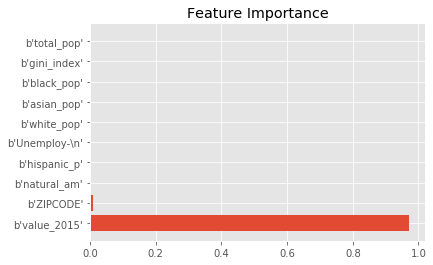

In [183]:
featureNames, featureScores = zip(*list(feature_sort[0:10]))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('Feature Importance')

In [184]:
from sklearn.model_selection import cross_val_score

print(np.sqrt(-1* cross_val_score(randomForest, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))


[71.95044536 55.69636232 54.14635509 58.28531443 69.23674698]
